## Computing rho max in terms of eta_critic - eta


In [7]:
# Sorting the columns from minor to major, in case the density has not been stored properly

# Read the contents of the text file into a list
with open('density_max.dat', 'r') as file:
    lines = file.readlines()

# Sort the lines based on the values in the 4th column
sorted_lines = sorted(lines, key=lambda line: float(line.split()[3]))

# Write the sorted lines to a new file
with open('output_density.dat', 'w') as file:
    file.writelines(sorted_lines)


In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Loading the data
phi0, density, subs, log_subs, log_den = np.loadtxt("output_density.dat").T

In [13]:
#Generation of the runscript to compute the echoing period from the adjusted plot of the central density

import numpy as np

eta_weak = 0.3364266156435
eta_strong = 0.3364266156436
eta_c = 0.5 * (eta_weak + eta_strong)
starting_point = -22
last_point = -5.5
eta_initial = eta_c - np.exp(starting_point)
eta_final = eta_c - np.exp(last_point)
delta_x = 0.5
eta_insert = 0
length = np.int(np.abs((starting_point - last_point) * 2))

for i in range(length):
    eta_insert = eta_c - np.exp(starting_point) * np.exp(0.5 * i)
    line = f"taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 {eta_insert:.13f}"
    print(line)


taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266153646
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266151836
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266148853
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266143934
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266135824
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266122453
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266100408
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266064061
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364266004136
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364265905336
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364265742442
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364265473875
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 0.3364265031084
taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162

/tmp/ipykernel_4659/281577758.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  length = np.int(np.abs((starting_point - last_point) * 2))


## FITTING THE FUNCTION 

In [15]:
from scipy.optimize import curve_fit
def adjust(x, C, gamma, k, w, phase):
    y = C - 2*gamma*x + k*np.sin(w*x + phase)
    return y

# A guess can be done to achieve a better result
guess = [1, 0.37, 0.1, 1.32, -1]
parameters, covariance = curve_fit(adjust, log_subs, log_den, p0 = guess)
fit_c = parameters[0]
fit_gamma = parameters[1]
fit_k = parameters[2]
fit_w = parameters[3]
fit_phase = parameters[4]

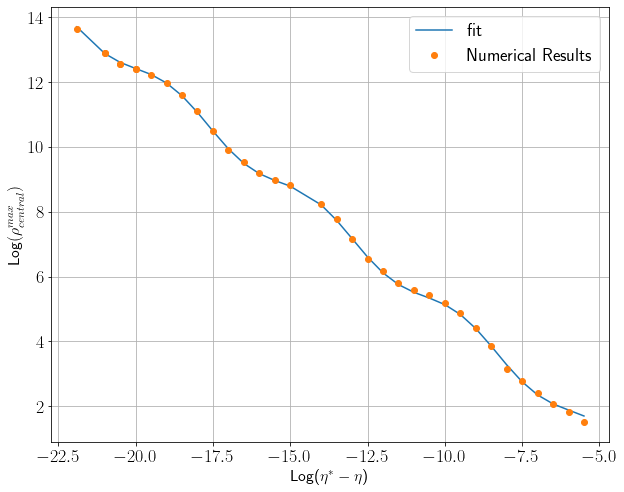

In [18]:
import matplotlib as mpl

# Configure matplotlib to use LaTeX 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' 


fit_function = adjust(log_subs, fit_c, fit_gamma, fit_k, fit_w, fit_phase)
plt.figure(figsize=(10, 8))  
plt.plot(log_subs, fit_function, '-', label='fit')
plt.plot(log_subs, log_den, 'o', label ='Numerical Results')
plt.legend(fontsize = 18)
plt.grid()
plt.ylabel(r'$\text{Log}(\rho^{max}_{central})$', fontsize = 16)
plt.xlabel(r'Log($\eta^* - \eta$)', fontsize = 16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.show()
plt.savefig('/home/usermiguel/Desktop/changing_code_comments')

In [23]:
# Computing the standard error
SE = np.sqrt(np.diag(covariance))
SE_C = SE[0]
SE_gamma = SE[1]
SE_k = SE[2]
SE_w = SE[3]
SE_phase = SE[4]
Delta = 4*np.pi*fit_gamma/fit_w
error_delta = 4*np.pi*(SE_gamma/fit_w + fit_w*SE_w/fit_w**2)
print(F'The value of c is {fit_c:.5f} with standard error of {SE_C:.5f}.')
print(F'The value of gamma is {fit_gamma:.5f} with standard error of {SE_gamma:.5f}.')
print(F'The value of k is {fit_k:.5f} with standard error of {SE_k:.5f}.')
print(F'The value of w is {fit_w:.5f} with standard error of {SE_w:.5f}.')
print(F'The value of phase is {fit_phase:.5f} with standard error of {SE_phase:.5f}.')
print(F'The value of Delta is {Delta:.5f} with standard error of {error_delta:.5f}.')


The value of c is -2.62539 with standard error of 0.03066.
The value of gamma is 0.37644 with standard error of 0.00104.
The value of k is 0.30467 with standard error of 0.01467.
The value of w is 1.34568 with standard error of 0.00926.
The value of phase is 1.75074 with standard error of 0.13644.
The value of Delta is 3.51530 with standard error of 0.09621.


In [22]:
# Generating the search of the constant 
c_ini = 1.3283900
while c_ini < 1.3283901:
    c_ini = c_ini + 0.000000015
    line = f"taskset -c 0,1,2,3,4,5 ./SFcollapse1D 320 16 5.3162 0.08 {c_ini:.8f}"
    out_termination = f"{c_ini:.8f}"
    line2 = f"mv out_central_values.dat out_{out_termination}.dat"

## Plotting the useful graphs 

Text(0.5, 1.0, 'Evolution of the lapse function')

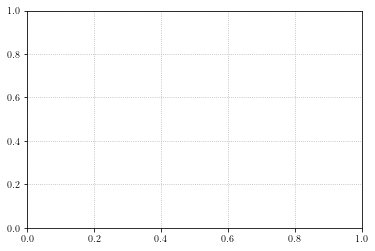

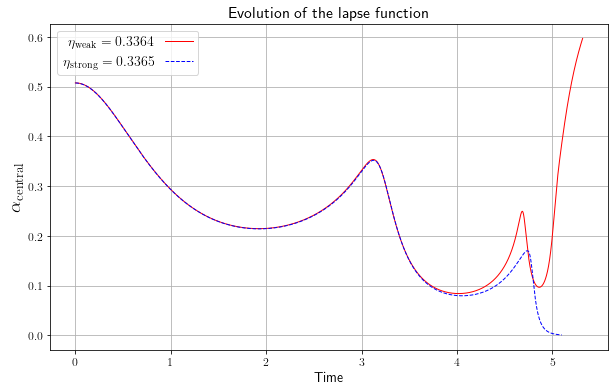

In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


# Weak data 
t_w, alp_w, sf_w = np.loadtxt("out_weak_poco.dat").T

# Strong data
t_s, alp_s, sf_s = np.loadtxt("out_strong_poco.dat").T

colour_w = 'red'
colour_s = 'blue'
linewidth = 1 
plt.grid(ls=':')

# Plot of the data
fig, ax = plt.subplots(figsize=(10, 6))  # Create the figure and axis

ax.plot(t_w, alp_w, lw=linewidth, c=colour_w, label=r"$\eta_{\rm weak} = 0.3364$")
ax.plot(t_s, alp_s, lw=linewidth, c=colour_s, ls='--', label=r"$\eta_{\rm strong} = 0.3365$")
ax.legend(loc=2, markerfirst=False, fontsize=14)
ax.grid()
# Set titles for axis labels
ax.set_xlabel('Time', fontsize=14)  
ax.set_ylabel(r"$\alpha_{\rm central}$", fontsize=19)  

# Increase font size of axis labels
ax.tick_params(axis='both', which='major', labelsize=12) 


# Set title for the plot
ax.set_title('Evolution of the lapse function', fontsize=16)




Text(0.5, 1.0, 'Evolution of the lapse function')

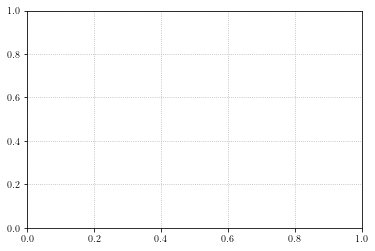

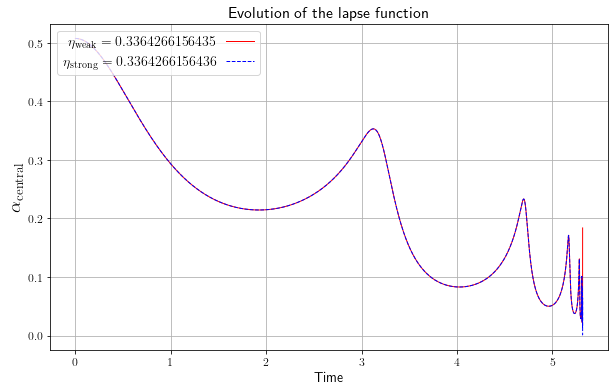

In [57]:
# Plot of the graph with a more precise value of the critical constant

# Weak data 
t_w, alp_w, sf_w = np.loadtxt("out_weak.dat").T

# Strong data
t_s, alp_s, sf_s = np.loadtxt("out_strong.dat").T

colour_w = 'red'
colour_s = 'blue'
linewidth = 1 
plt.grid(ls=':')

# Plot of the data
fig, ax = plt.subplots(figsize=(10, 6))  

ax.plot(t_w, alp_w, lw=linewidth, c=colour_w, label=r"$\eta_{\rm weak} = 0.3364266156435$")
ax.plot(t_s, alp_s, lw=linewidth, c=colour_s, ls='--', label=r"$\eta_{\rm strong} =  0.3364266156436$")
ax.legend(loc=2, markerfirst=False, fontsize=14)
ax.grid()
# Set titles for axis labels
ax.set_xlabel('Time', fontsize=14)  
ax.set_ylabel(r"$\alpha_{\rm central}$", fontsize=19) 

# Increase font size of axis labels
ax.tick_params(axis='both', which='major', labelsize=12)  


# Set title for the plot
ax.set_title('Evolution of the lapse function', fontsize=16)




Text(0.5, 1.0, 'Zoom in to analyse the late evolution')

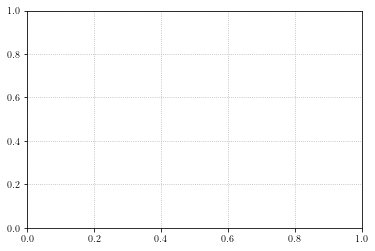

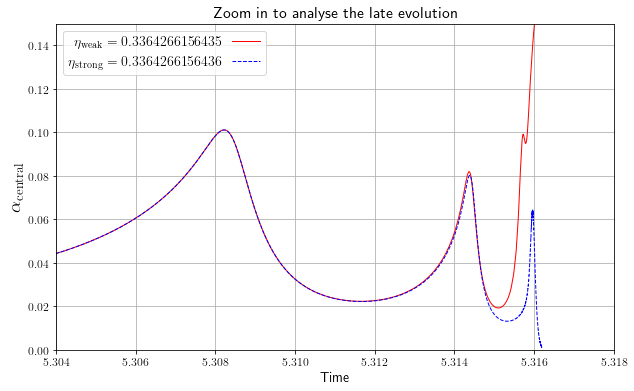

In [58]:
# Plot of the graph previous graph with some zoom applied 

# Weak data 
t_w, alp_w, sf_w = np.loadtxt("out_weak.dat").T

# Strong data
t_s, alp_s, sf_s = np.loadtxt("out_strong.dat").T

colour_w = 'red'
colour_s = 'blue'
linewidth = 1 
plt.grid(ls=':')

# Plot of the code
fig, ax = plt.subplots(figsize=(10, 6))  

ax.plot(t_w, alp_w, lw=linewidth, c=colour_w, label=r"$\eta_{\rm weak} = 0.3364266156435$")
ax.plot(t_s, alp_s, lw=linewidth, c=colour_s, ls='--', label=r"$\eta_{\rm strong} = 0.3364266156436$")
ax.legend(loc=2, markerfirst=False, fontsize=14)
plt.xlim(5.304,5.318)
plt.ylim(0.0,0.15)
ax.grid()
# Set titles for axis labels
ax.set_xlabel('Time', fontsize=14)  
ax.set_ylabel(r"$\alpha_{\rm central}$", fontsize=19)  
# Increase font size of axis labels
ax.tick_params(axis='both', which='major', labelsize=12) 


# Set title for the plot
ax.set_title('Zoom in to analyse the late evolution', fontsize=16)




## PLOTS FOR THE SCALAR FIELD

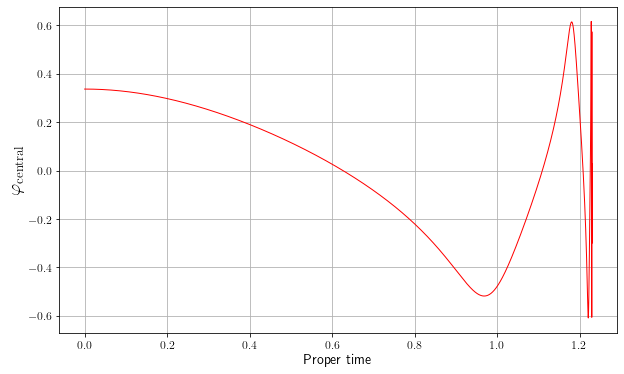

In [68]:
# The logarithmic time has to be computed
def proper_time(time,alpha):
    proper_time = np.zeros(len(time))
    for n in range(1,len(time)):
        proper_time[n] = proper_time[n-1] + 0.5*(time[n]-time[n-1])*(alpha[n]+alpha[n-1])

    return proper_time

# Weak data 
t_w, alp_w, sf_w = np.loadtxt("out_weak.dat").T
tau = proper_time(t_w,alp_w)

colour_w = 'red'

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tau, sf_w, lw=linewidth, c=colour_w, label=r"$\varphi_{\rm central}$")
ax.grid()

# Set titles for axis labels
ax.set_xlabel('Proper time', fontsize=14)  
ax.set_ylabel(r"$\varphi_{\rm central}$", fontsize=19)  

# Increase font size of axis labels
ax.tick_params(axis='both', which='major', labelsize=12) 

In [24]:
# Function to compute the zero crossings of the scalar field, 

# Function to compute proper time
def proper_time(time, alpha):
    proper_time = np.zeros(len(time))
    for n in range(1, len(time)):
        proper_time[n] = proper_time[n - 1] + 0.5 * (time[n] - time[n - 1]) * (alpha[n] + alpha[n - 1])
    return proper_time

# Weak data
t_w, alp_w, sf_w = np.loadtxt("out_weak.dat").T
tau = proper_time(t_w, alp_w)

# Zero crossing of the scalar field
zero_crossings = np.where(np.diff(np.sign(sf_w)))[0]

# Compute tau intersection
tau_intersection = np.array([tau[z + 1] for z in zero_crossings])
print(tau_intersection)
# Compute tau star
tau_star = []
num_zero_crossings = len(zero_crossings)
for i in range(num_zero_crossings - 2):
    taun_pos = zero_crossings[num_zero_crossings - 2 * i - 1] + 1
    taum_pos = zero_crossings[num_zero_crossings - i - 1] + 1
    if taun_pos < len(tau) and taum_pos < len(tau):
        taun, taum = tau[taun_pos], tau[taum_pos]
        taun_plus, taum_plus = tau[taun_pos + 1], tau[taum_pos + 1]
        tau_star_num = taun * taum_plus - taum * taun_plus
        tau_star_den = taun - taun_plus - taum + taum_plus
        if tau_star_den != 0:  # Avoid division by zero
            tau_star.append(tau_star_num / tau_star_den)


[0.62598452 1.10948431 1.20820404 1.2257027  1.2288929  1.22945815
 1.22956396 1.22961775]


In [25]:
taum = 1.22956396
taum1 = 1.22961775
taun = 1.22945815
taun1 = 1.22956396
tausnum = taun*taum1 - taum*taun1 
tausden = taun - taun1 - taum + taum1 
taus = tausnum/tausden 
Deltan = taus - taun 
Deltad = taus - taun1 
logart = Deltan/ Deltad 
final = 2*np.log(logart)

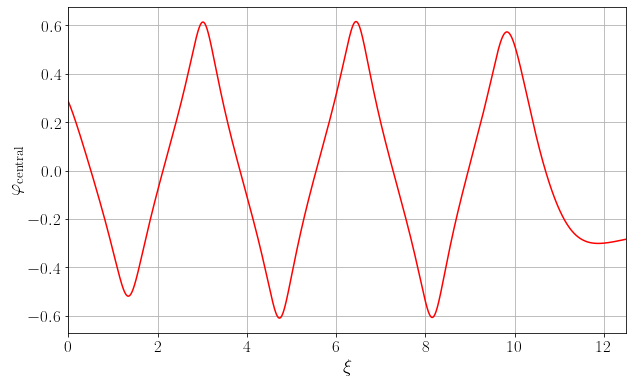

In [164]:
# Plot of the scalar field in terms of Choptuik's coordinates. 
# Function to compute proper time
def proper_time(time, alpha):
    proper_time = np.zeros(len(time))
    for n in range(1, len(time)):
        proper_time[n] = proper_time[n - 1] + 0.5 * (time[n] - time[n - 1]) * (alpha[n] + alpha[n - 1])
    return proper_time

# Weak data
t_w, alp_w, sf_w = np.loadtxt("out_weak.dat").T
tau = proper_time(t_w, alp_w)
tau_star = 1.22958674
size       = len(tau[tau<=tau_star])
xiw      = np.zeros(size)
sfxiw    = np.zeros(size)
for i in range(size):
    xiw[i]   = -np.log(np.abs(tau_star-tauw[i]))
    sfxiw[i] = sf_w[i]
    

#Plot 
fig, ax = plt.subplots(figsize=(10, 6))


ax.set_xlabel(r"$\xi $",fontsize=19)
ax.set_ylabel(r"$\varphi_{\rm central}$", fontsize=19)  
ax.plot(xiw,sfxiw,'red')
ax.grid()
plt.xlim(0.0,12.5)
ax.tick_params(axis='both', which='major', labelsize=17) 